# ДОМАШНЕЕ ЗАДАНИЕ 1. Дескриптивный анализ данных

Астахов С.В. ИУ6-22М

In [3]:
surname = "Астахов"  # Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [1, 42, 21, 21, 34,  6, 44, 26, 18, 44, 38, 26, 14, 43,  4, 49, 45,
        7, 42, 29,  4,  9, 36, 34, 31, 29,  5, 30,  4, 19, 28, 25, 33]

d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 40 + 1

print("Задача № 1, шаг 5 - вариант: ", variant % 5 + 1)
print("Задача № 1, шаг 11 - вариант: ", variant % 2 + 1 )
print("задача № 2 - вариант: ", variant % 4 + 1)

Задача № 1, шаг 5 - вариант:  1
Задача № 1, шаг 11 - вариант:  1
задача № 2 - вариант:  1


In [4]:
# импорт библиотек
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [5]:
# Чтение в датафрейм c 14 строки
df = pd.read_excel("./wgidataset.xlsx", sheet_name = "ControlofCorruption", header = [13,14]) # заголовок из 2 строк
df.head() # вывод первых 5 записей

Unnamed: 0_level_0 Unnamed: 1_level_0      1996                              \
   Country/Territory               Code  Estimate    StdErr NumSrc       Rank   
0              Aruba                ABW       NaN       NaN    NaN        NaN   
1            Andorra                ADO  1.318143  0.480889    1.0  87.096771   
2        Afghanistan                AFG -1.291705  0.340507    2.0   4.301075   
3             Angola                AGO -1.167702  0.262077    4.0   9.677420   
4           Anguilla                AIA       NaN       NaN    NaN        NaN   

                             1998            ...   2021                        \
       Lower      Upper  Estimate    StdErr  ... NumSrc       Rank      Lower   
0        NaN        NaN       NaN       NaN  ...    2.0  78.571426  62.857143   
1  72.043015  96.774193  1.334759  0.453149  ...    1.0  88.571426  70.000000   
2   0.000000  27.419355 -1.176012  0.324013  ...    8.0  12.380953   4.761905   
3   0.537634  27.419355 -1.180451  0.227055  ...   10.0  29.047619  19.523809   
4        NaN        NaN       NaN       NaN  ...    1.0  73.333336  50.952381   

                  2022                                                    
       Upper  Estimate    StdErr NumSrc       Rank      Lower      Upper  
0  89.047623  0.756785  0.317250    2.0  77.830185  60.849056  88.679245  
1  96.666664  1.270204  0.463415    1.0  88.679245  68.396225  97.169815  
2  20.952381 -1.183776  0.173320    8.0  12.264151   4.716981  20.283018  
3  40.476189 -0.601941  0.160003   10.0  30.660378  21.226416  43.396225  
4  89.047623  1.270204  0.463415    1.0  88.679245  68.396225  97.169815  

[5 rows x 146 columns]

In [6]:
# Избавление от мультииндекса и переименование колонок
df = df.rename(columns={"Unnamed: 0_level_0": "C/T", "Unnamed: 1_level_0": "CD"})
new_cols = map(lambda x: x[1]+"."+str(x[0]), list(df.columns.values)) # складываем значения колоночного мультииндкеса поэлементно
df = df.droplevel(0, axis=1) # удаляем первую строку колоночного индекса
df.columns = new_cols
df = df.rename(columns={"Country/Territory.C/T": "Country/Territory", "Code.CD": "Code"})
df.head()

,Country/Territory,Code,Estimate.1996,StdErr.1996,NumSrc.1996,Rank.1996,Lower.1996,Upper.1996,Estimate.1998,StdErr.1998,...,NumSrc.2021,Rank.2021,Lower.2021,Upper.2021,Estimate.2022,StdErr.2022,NumSrc.2022,Rank.2022,Lower.2022,Upper.2022
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,78.571426,62.857143,89.047623,0.756785,0.317250,2.0,77.830185,60.849056,88.679245
1,Andorra,ADO,1.318143,0.480889,1.0,87.096771,72.043015,96.774193,1.334759,0.453149,...,1.0,88.571426,70.000000,96.666664,1.270204,0.463415,1.0,88.679245,68.396225,97.169815
2,Afghanistan,AFG,-1.291705,0.340507,2.0,4.301075,0.000000,27.419355,-1.176012,0.324013,...,8.0,12.380953,4.761905,20.952381,-1.183776,0.173320,8.0,12.264151,4.716981,20.283018
3,Angola,AGO,-1.167702,0.262077,4.0,9.677420,0.537634,27.419355,-1.180451,0.227055,...,10.0,29.047619,19.523809,40.476189,-0.601941,0.160003,10.0,30.660378,21.226416,43.396225
4,Anguilla,AIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,73.333336,50.952381,89.047623,1.270204,0.463415,1.0,88.679245,68.396225,97.169815


In [7]:
df_sort_desc = df.iloc[::-1] #сортировка по убыванию индекса
df_sort_desc #вывод

,Country/Territory,Code,Estimate.1996,StdErr.1996,NumSrc.1996,Rank.1996,Lower.1996,Upper.1996,Estimate.1998,StdErr.1998,...,NumSrc.2021,Rank.2021,Lower.2021,Upper.2021,Estimate.2022,StdErr.2022,NumSrc.2022,Rank.2022,Lower.2022,Upper.2022
213,Zimbabwe,ZWE,-0.278847,0.244907,5.0,47.849461,30.645161,60.752689,-0.504802,0.198134,...,12.0,10.000000,4.285714,17.619047,-1.255139,0.151262,12.0,8.490566,4.245283,17.924528
212,Zambia,ZMB,-0.840641,0.262077,4.0,24.731182,5.913979,41.397850,-0.853156,0.227055,...,12.0,25.714285,17.619047,33.809525,-0.529200,0.152557,12.0,34.433964,23.584906,45.754719
211,"Congo, Dem. Rep.",ZAR,-1.647852,0.315914,3.0,0.000000,0.000000,12.365591,-1.416679,0.310343,...,11.0,4.285714,0.000000,6.666667,-1.544474,0.149016,12.0,3.301887,0.471698,7.075472
210,South Africa,ZAF,0.732927,0.210325,6.0,76.344086,66.129036,81.182793,0.638809,0.188628,...,11.0,53.809525,46.190475,60.000000,-0.319765,0.157883,11.0,44.811321,31.603773,52.358490
209,Serbia,SRB,-1.140072,0.262077,4.0,11.827957,0.537634,29.032259,-1.195605,0.191027,...,9.0,35.714287,26.190475,48.095238,-0.456188,0.158030,9.0,35.377357,24.528301,48.113209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Anguilla,AIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,73.333336,50.952381,89.047623,1.270204,0.463415,1.0,88.679245,68.396225,97.169815
3,Angola,AGO,-1.167702,0.262077,4.0,9.677420,0.537634,27.419355,-1.180451,0.227055,...,10.0,29.047619,19.523809,40.476189,-0.601941,0.160003,10.0,30.660378,21.226416,43.396225
2,Afghanistan,AFG,-1.291705,0.340507,2.0,4.301075,0.000000,27.419355,-1.176012,0.324013,...,8.0,12.380953,4.761905,20.952381,-1.183776,0.173320,8.0,12.264151,4.716981,20.283018
1,Andorra,ADO,1.318143,0.480889,1.0,87.096771,72.043015,96.774193,1.334759,0.453149,...,1.0,88.571426,70.000000,96.666664,1.270204,0.463415,1.0,88.679245,68.396225,97.169815


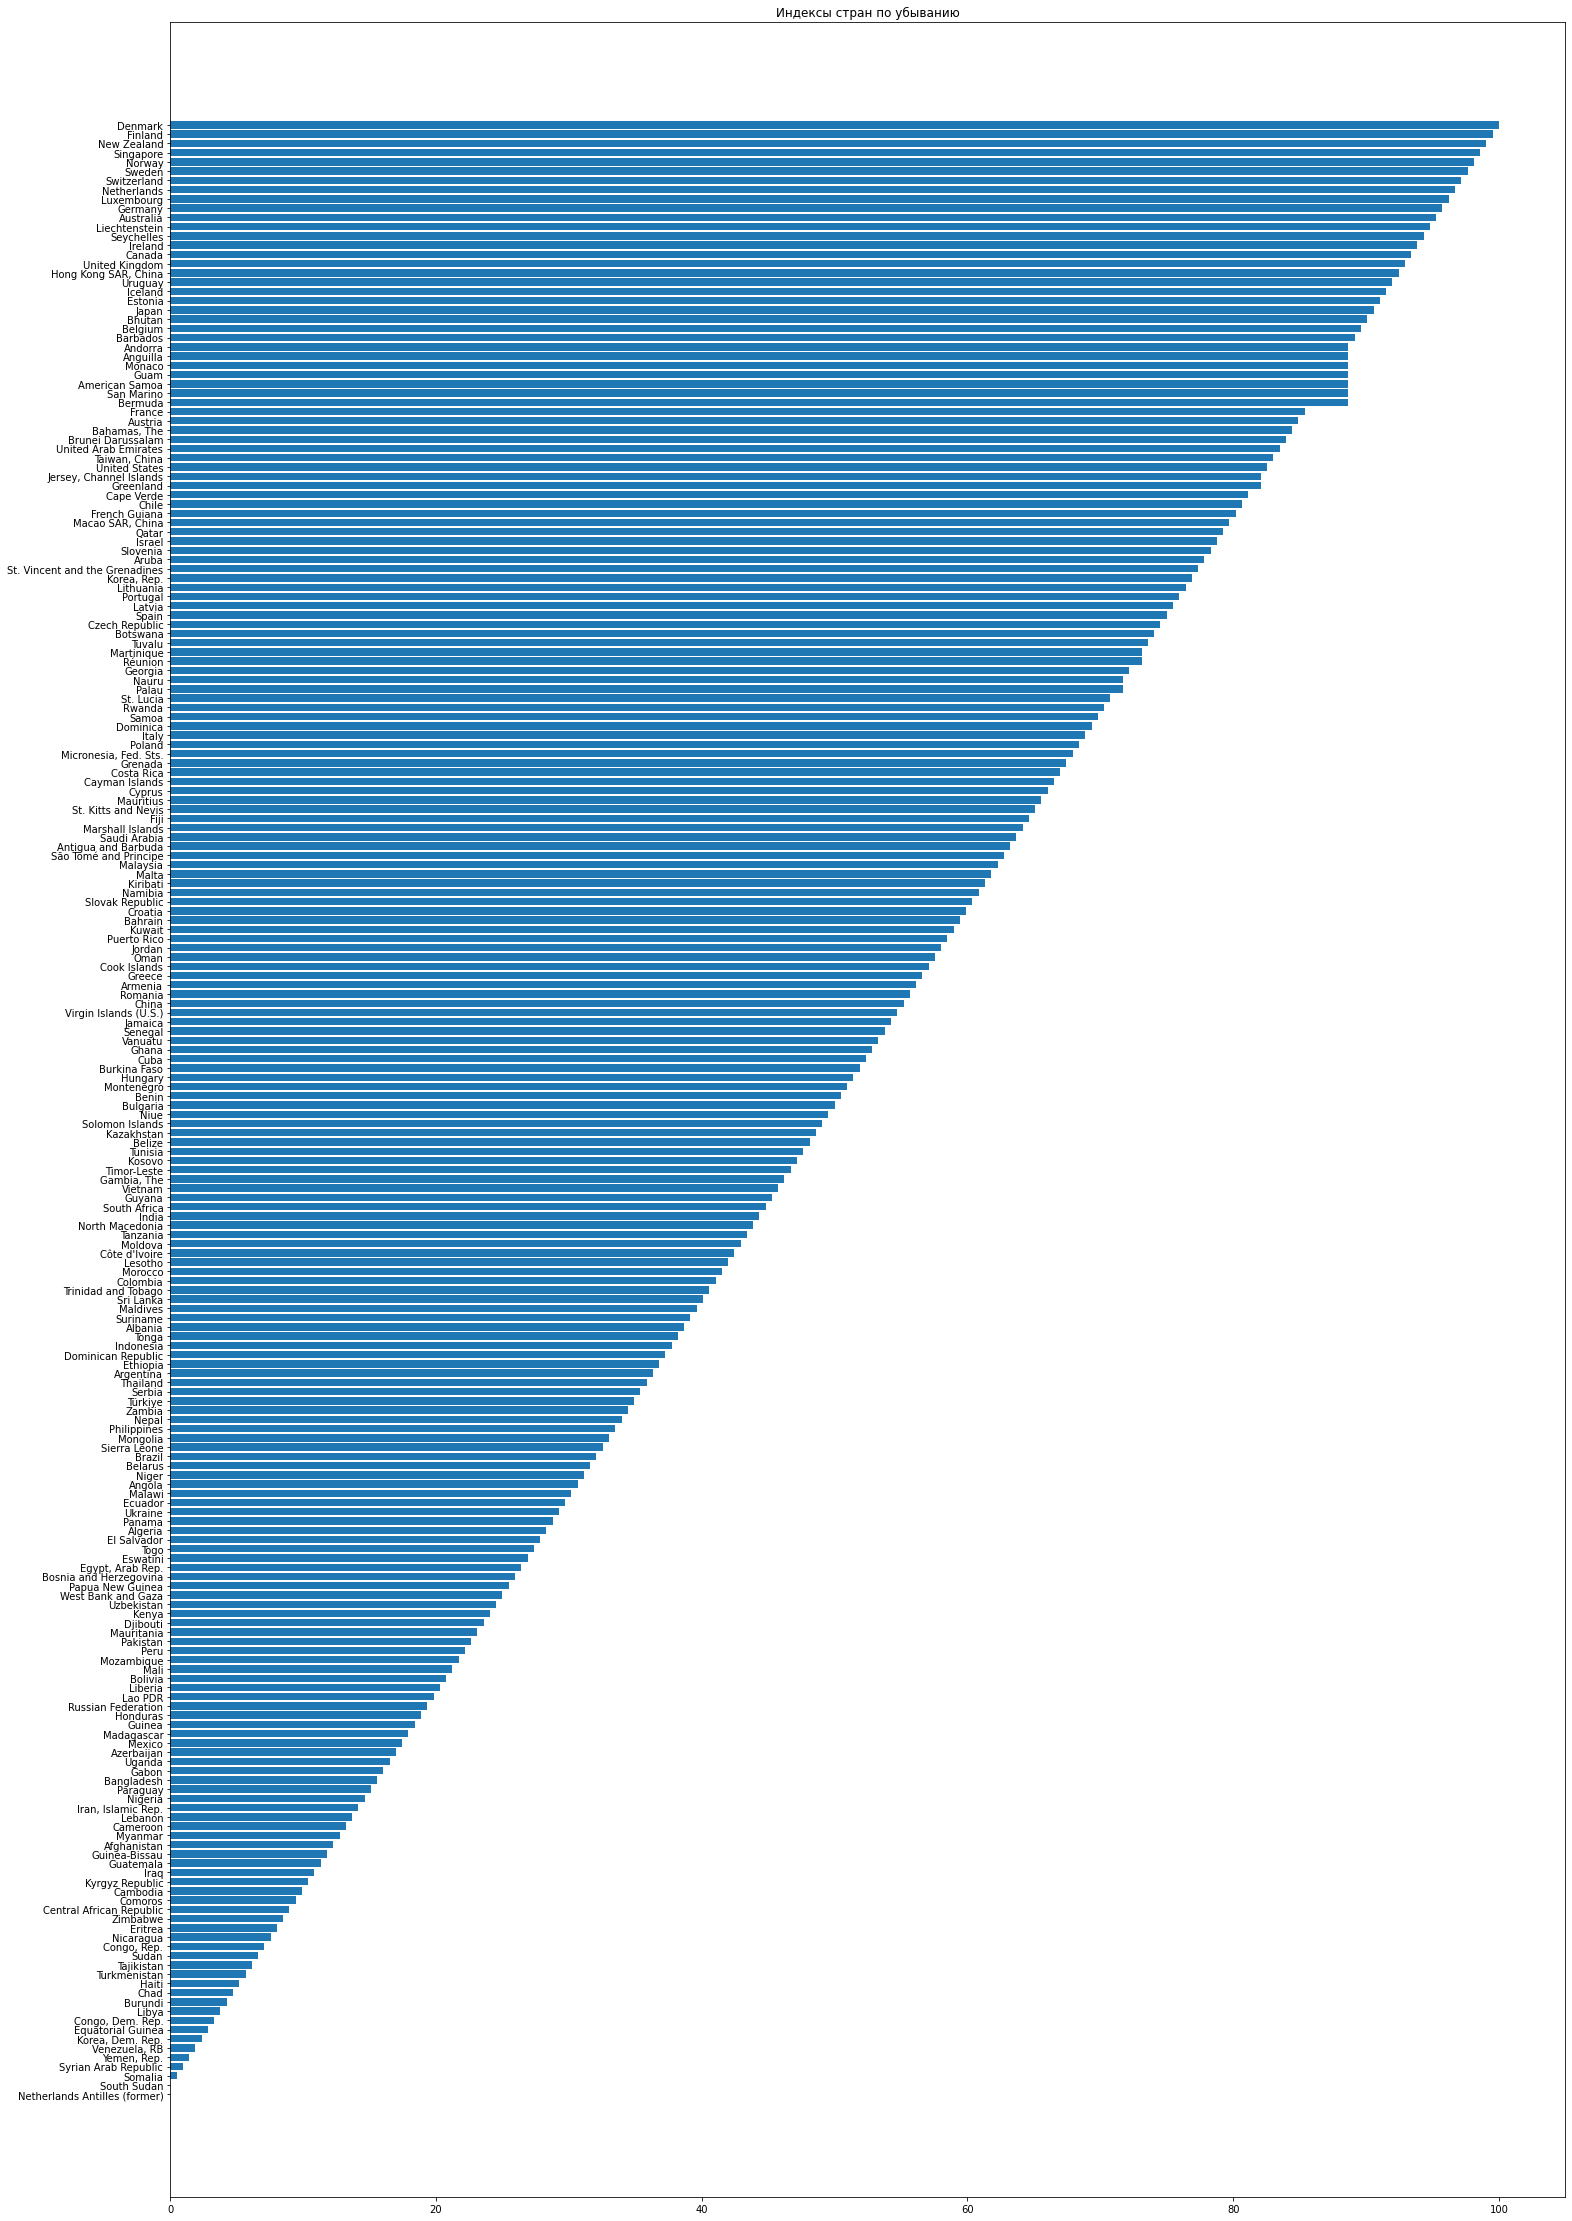

In [8]:
df_sort_desс_fillna = df_sort_desc.copy()
df_sort_desс_fillna["Rank.2022"] = df_sort_desс_fillna["Rank.2022"].fillna(0)
dfSort = df_sort_desс_fillna.sort_values("Rank.2022", ascending=True) #сортирование данных по столбцу Rank за 2022-ый год 
plt.figure(figsize=(25, 40)) #размер графика
plt.title('Индексы стран по убыванию')
plt.barh(dfSort["Country/Territory"], dfSort['Rank.2022']) #формирование графика
plt.show() #Отображение

In [9]:
# Чтение файла с регионами в датафрейм
df_reg = pd.read_excel("./regions.xlsx") 
df_reg.head(10)

,Country,Code,Region
0,Afghanistan,AFG,AP
1,Albania,ALB,ECA
2,Algeria,DZA,MENA
3,Angola,AGO,SSA
4,Argentina,ARG,AME
5,Armenia,ARM,ECA
6,Australia,AUS,AP
7,Austria,AUT,WE/EU
8,Azerbaijan,AZE,ECA
9,Bahamas,BHS,AME


In [10]:
# Join df с регионами и со странами
merged_df = pd.merge(df_reg, df, on='Code')
sort_for_reg = merged_df.groupby("Region")
sort_for_reg
#создание датафрейма по региону MENA
df_region = sort_for_reg.get_group("AP")
df_region = df_region.drop('Country/Territory', axis=1, inplace=False) # Дублируется столбцом "Country"
df_region = df_region.set_index("Country") # выставление столбца Country индексом
df_region

,Code,Region,Estimate.1996,StdErr.1996,NumSrc.1996,Rank.1996,Lower.1996,Upper.1996,Estimate.1998,StdErr.1998,...,NumSrc.2021,Rank.2021,Lower.2021,Upper.2021,Estimate.2022,StdErr.2022,NumSrc.2022,Rank.2022,Lower.2022,Upper.2022
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,AP,-1.291705,0.340507,2.0,4.301075,0.000000,27.419355,-1.176012,0.324013,...,8.0,12.380953,4.761905,20.952381,-1.183776,0.173320,8.0,12.264151,4.716981,20.283018
Australia,AUS,AP,1.877356,0.210325,6.0,93.548386,90.322578,99.462364,1.798130,0.188628,...,9.0,94.761902,89.047623,96.666664,1.764490,0.162881,9.0,95.283020,89.622643,97.169815
Bangladesh,BGD,AP,-0.969682,0.262077,4.0,17.741936,2.688172,34.946236,-0.773011,0.227055,...,12.0,18.095238,10.952381,26.190475,-1.075527,0.153577,12.0,15.566038,7.075472,21.698112
Bhutan,BTN,AP,0.942838,0.340507,2.0,81.182793,66.129036,90.322578,0.883641,0.324013,...,7.0,90.476189,84.285713,95.714287,1.514259,0.200353,7.0,90.094337,83.962265,95.754715
Cambodia,KHM,AP,-1.019842,0.275614,3.0,16.129032,2.150538,32.795700,-0.988312,0.232248,...,11.0,11.428572,4.761905,18.571428,-1.241499,0.158586,11.0,9.905661,4.245283,18.867924
China,CHN,AP,-0.271190,0.188622,7.0,48.387096,32.258064,58.602150,-0.353955,0.172851,...,10.0,56.190475,48.095238,62.380951,0.015970,0.153877,10.0,55.188679,48.113209,62.264153
Fiji,FJI,AP,0.659303,0.340507,2.0,73.655914,59.677418,84.408600,0.663798,0.324013,...,4.0,65.714287,54.285713,80.476189,0.388570,0.290792,5.0,64.622643,51.415092,79.245285
Hong Kong,HKG,AP,1.444894,0.204951,6.0,89.784943,81.182793,93.010750,1.303382,0.186292,...,9.0,94.285713,89.047623,96.190475,1.610646,0.162881,9.0,92.452827,89.150940,95.754715
India,IND,AP,-0.381090,0.188622,7.0,43.010754,29.569893,53.763439,-0.258727,0.172851,...,12.0,45.238094,31.904762,50.476189,-0.321811,0.147102,12.0,44.339622,32.547169,51.886791


In [11]:
WGI = df_region.filter(regex='Estimate|Country')#Фильтрование по Estimate|Country 
# WGI.columns = map(lambda x: x.split(".")[1], list(WGI.columns.values)) # Убрать слово Estimate
WGI.head()

,Estimate.1996,Estimate.1998,Estimate.2000,Estimate.2002,Estimate.2003,Estimate.2004,Estimate.2005,Estimate.2006,Estimate.2007,Estimate.2008,...,Estimate.2013,Estimate.2014,Estimate.2015,Estimate.2016,Estimate.2017,Estimate.2018,Estimate.2019,Estimate.2020,Estimate.2021,Estimate.2022
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-1.291705,-1.176012,-1.271724,-1.251137,-1.344180,-1.350647,-1.447252,-1.446292,-1.613251,-1.672096,...,-1.445908,-1.364743,-1.354240,-1.540353,-1.531910,-1.502881,-1.419499,-1.493700,-1.152327,-1.183776
Australia,1.877356,1.798130,1.862088,1.761436,1.895287,2.005869,1.942668,1.950813,2.000873,2.027343,...,1.777870,1.849465,1.841354,1.772004,1.752321,1.767378,1.788173,1.632956,1.707646,1.764490
Bangladesh,-0.969682,-0.773011,-1.212083,-1.449087,-1.541721,-1.597115,-1.406467,-1.442983,-1.063240,-1.046788,...,-0.893825,-0.892130,-0.844026,-0.886878,-0.858939,-0.926947,-1.016994,-1.003677,-0.985861,-1.075527
Bhutan,0.942838,0.883641,0.574340,0.449922,1.087011,0.893403,0.871917,0.854817,0.928756,0.912390,...,0.912420,1.306129,0.989678,1.091020,1.529063,1.590518,1.572266,1.618237,1.507121,1.514259
Cambodia,-1.019842,-0.988312,-0.967183,-0.990784,-0.989836,-1.058346,-1.223740,-1.260386,-1.151690,-1.241711,...,-1.063722,-1.146750,-1.153124,-1.301331,-1.317362,-1.356795,-1.323166,-1.271122,-1.197489,-1.241499


In [12]:
WGI = WGI.T #транспонирование
WGI.head()

Country,Afghanistan,Australia,Bangladesh,Bhutan,Cambodia,China,Fiji,Hong Kong,India,Indonesia,...,Pakistan,Papua New Guinea,Philippines,Singapore,Solomon Islands,Sri Lanka,Taiwan,Thailand,Vanuatu,Vietnam
Estimate.1996,-1.291705,1.877356,-0.969682,0.942838,-1.019842,-0.271190,0.659303,1.444894,-0.381090,-0.864106,...,-1.220030,-0.433467,-0.358872,2.107434,0.340782,-0.056539,0.580821,-0.361192,0.216309,-0.489799
Estimate.1998,-1.176012,1.798130,-0.773011,0.883641,-0.988312,-0.353955,0.663798,1.303382,-0.258727,-1.160077,...,-1.080915,-0.698878,-0.381950,2.057286,0.361923,-0.083365,0.583798,-0.141036,0.238910,-0.491154
Estimate.2000,-1.271724,1.862088,-1.212083,0.574340,-0.967183,-0.208549,0.630552,1.292820,-0.403302,-0.908694,...,-0.894910,-0.786501,-0.527594,2.139873,0.177562,-0.199229,0.696333,-0.230174,0.227800,-0.584863
Estimate.2002,-1.251137,1.761436,-1.449087,0.449922,-0.990784,-0.557898,0.610876,1.666942,-0.555382,-1.137303,...,-0.955986,-0.947748,-0.538532,2.262734,0.182450,-0.216593,0.619227,-0.338848,0.230140,-0.560991
Estimate.2003,-1.344180,1.895287,-1.541721,1.087011,-0.989836,-0.395265,0.276082,1.800160,-0.456321,-0.979824,...,-0.804457,-0.813448,-0.635372,2.169168,0.214312,-0.272020,0.814145,-0.196024,0.262945,-0.490873


<AxesSubplot:title={'center':'WGI за 1996-2022 Asia Pacific estimate'}>

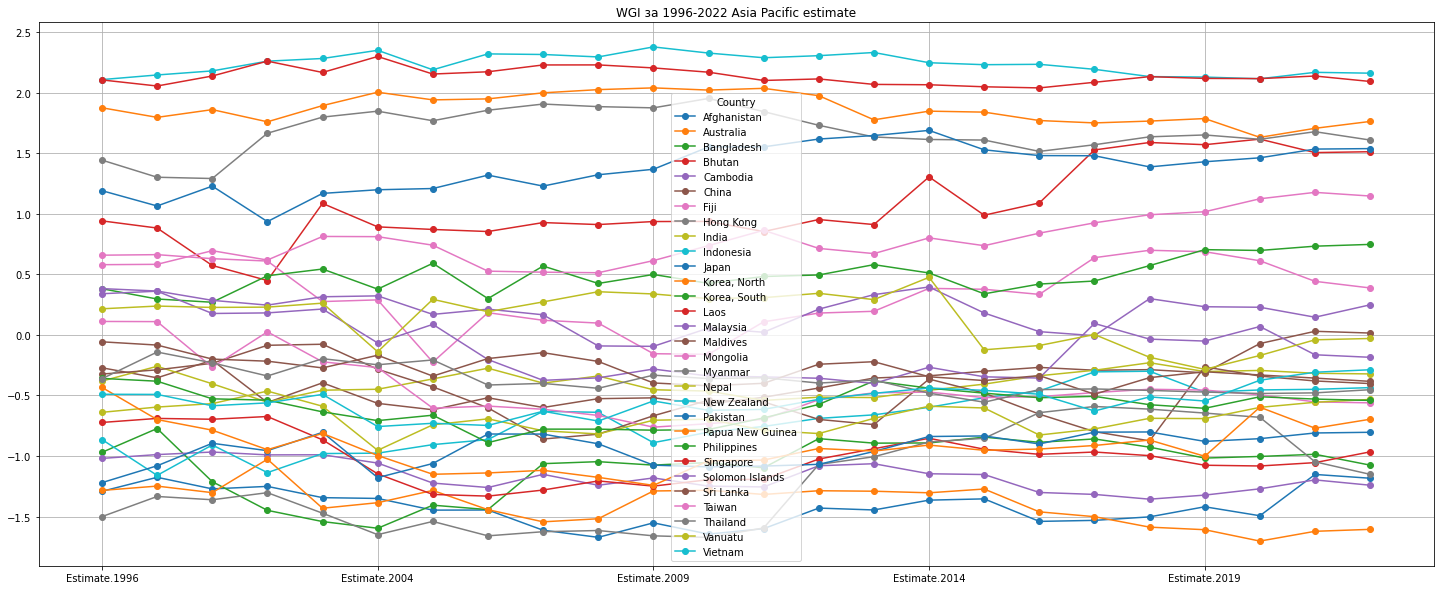

In [13]:
WGI.plot(grid=1,
         figsize=(25,10), 
         title='WGI за 1996-2022 Asia Pacific estimate', 
         marker='o', 
         legend = True)

In [14]:
WGI = WGI.T
#вывод наименьшего
min_W = WGI["Estimate.2022"].idxmin()
min_W

'Korea, North'

In [15]:
#вывод наибольшего
max_W = WGI["Estimate.2022"].idxmax()
max_W

'New Zealand'

In [16]:
#вывод среднего значения за каждый период
mean = WGI.mean()
mean

Estimate.1996    0.005390
Estimate.1998    0.004409
Estimate.2000   -0.035114
Estimate.2002   -0.043584
Estimate.2003   -0.024761
Estimate.2004   -0.117873
Estimate.2005   -0.141014
Estimate.2006   -0.154418
Estimate.2007   -0.139037
Estimate.2008   -0.156720
Estimate.2009   -0.154840
Estimate.2010   -0.140798
Estimate.2011   -0.131607
Estimate.2012   -0.063054
Estimate.2013   -0.046824
Estimate.2014    0.012366
Estimate.2015   -0.049325
Estimate.2016   -0.073050
Estimate.2017   -0.025685
Estimate.2018   -0.012606
Estimate.2019   -0.013031
Estimate.2020    0.016584
Estimate.2021    0.016733
Estimate.2022    0.012814
dtype: float64

In [17]:
WGI = WGI.T

<AxesSubplot:title={'center':'WGA за 1996-2021 MENA estimate'}>

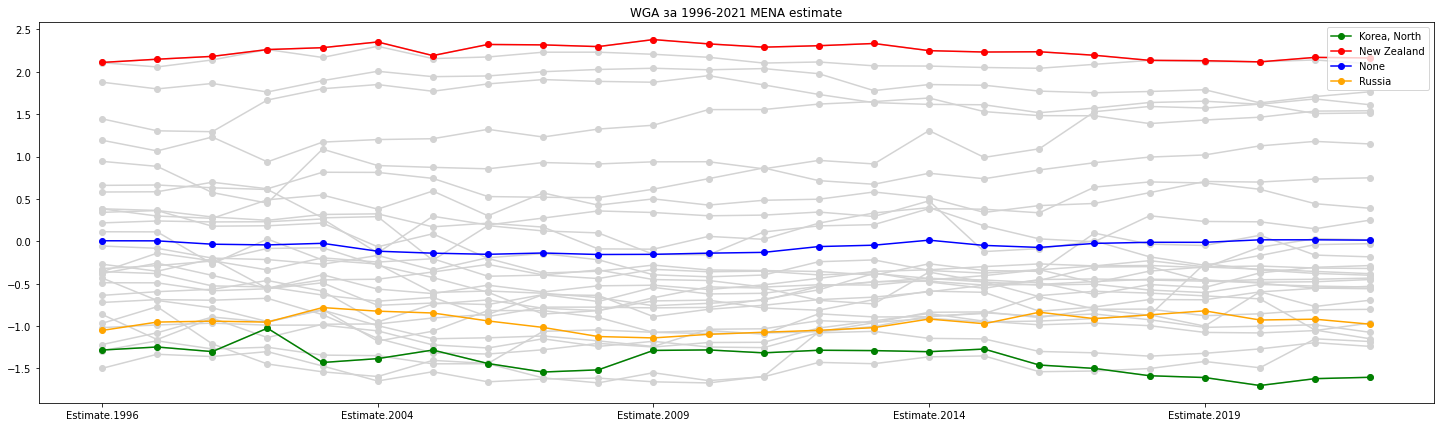

In [18]:
#выод графика индекса для всех стран региона AP
WGI.plot(color='lightgrey', grid=1, figsize=(25,7), 
         title='WGA за 1996-2021 MENA estimate', marker='o', legend = False)
WGI[min_W].plot(color='green', marker='o', legend = True)#вывод графика по минимальному значению
WGI[max_W].plot(color='red', marker='o', legend = True)#вывод графика по максимальному значению
mean.plot(color='blue', marker='o', legend = True)#вывод графика по среднему значению 
# #Вывод графика по России
df_russia = merged_df[merged_df["Country"].str.contains('Russ')].set_index('Country')
df_russia.filter(regex='Estimate').T["Russia"].plot(color='orange',marker='o', legend = True)

In [39]:
df_rank_change = pd.concat([df_region.filter(regex='Rank'), df_russia.filter(regex='Rank')], axis=0)
df_rank_change.head()

,Rank.1996,Rank.1998,Rank.2000,Rank.2002,Rank.2003,Rank.2004,Rank.2005,Rank.2006,Rank.2007,Rank.2008,...,Rank.2013,Rank.2014,Rank.2015,Rank.2016,Rank.2017,Rank.2018,Rank.2019,Rank.2020,Rank.2021,Rank.2022
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,4.301075,8.021390,4.787234,4.761905,4.761905,6.403941,1.463415,1.951220,0.970874,0.485437,...,0.947867,5.288462,5.714286,3.809524,3.809524,4.761905,5.714286,4.761905,12.380953,12.264151
Australia,93.548386,92.513367,93.617020,92.063492,93.650795,96.551727,95.609756,95.121948,95.631065,96.116508,...,93.838860,95.192307,94.761902,93.333336,92.857140,92.380951,94.761902,93.809525,94.761902,95.283020
Bangladesh,17.741936,28.877005,6.914894,1.587302,0.529101,0.985222,2.926829,2.926829,13.592233,15.048544,...,21.327015,18.750000,21.904762,18.571428,18.571428,17.142857,16.190475,17.142857,18.095238,15.566038
Bhutan,81.182793,81.283424,71.276596,70.899467,82.010582,80.788177,79.024391,77.560974,78.155342,78.640778,...,79.146919,88.461540,80.952377,81.428574,90.952377,91.428574,91.428574,93.333336,90.476189,90.094337
Cambodia,16.129032,19.251337,18.085106,17.460318,14.285714,14.285714,10.243902,7.317073,10.679611,5.339806,...,12.796208,11.538462,11.428572,9.047619,9.047619,8.571428,9.523809,10.476191,11.428572,9.905661


In [65]:
#вывод процент изменения относительно 1996-го года и 2022-го
# изменение в долях от единицы
procent_change = df_rank_change.filter(items=['Rank.1996','Rank.2022']).copy().pct_change(axis=1)['Rank.2022']
procent_change_readable = procent_change.map(lambda x: "{:.2f}%".format(x*100)) # перевод из долей в проценты
procent_change_concat = pd.concat([df_rank_change[['Rank.1996','Rank.2022']], procent_change, procent_change_readable], axis=1)
procent_change_concat.columns = ['Rank.1996','Rank.2022', "Change.relative", "Change.percent"]
procent_change_concat

,Rank.1996,Rank.2022,Change.relative,Change.percent
Country,,,,
Afghanistan,4.301075,12.264151,1.851415,185.14%
Australia,93.548386,95.283020,0.018543,1.85%
Bangladesh,17.741936,15.566038,-0.122641,-12.26%
Bhutan,81.182793,90.094337,0.109771,10.98%
Cambodia,16.129032,9.905661,-0.385849,-38.58%
China,48.387096,55.188679,0.140566,14.06%
Fiji,73.655914,64.622643,-0.122641,-12.26%
Hong Kong,89.784943,92.452827,0.029714,2.97%
India,43.010754,44.339622,0.030896,3.09%


In [43]:
# вся таблица берется из датафрейма выше по найденным ранее ключам
#создание 0-го столбца таблицы
Rows = ['mean_2022', 'max_2022', 'min_2022', 'Russia_2022']
#создание 0-ой коллонки таблицы
Cols = ['Регион', 'Страна', 'WGI 1996', 'WGI 2022', 'Изменение']
Tabl_proc  = pd.DataFrame(index=Rows,columns=Cols)

In [44]:
#создание первого столбца таблицы
Tabl_proc.loc['mean_2022', 'Регион'] = "AP" # из вариантов
Tabl_proc.loc['max_2022', 'Регион'] = "AP" # из вариантов
Tabl_proc.loc['min_2022', 'Регион'] = "AP" # из вариантов
# Получаем название региона для России
Tabl_proc.loc['Russia_2022', 'Регион'] = list(merged_df[merged_df["Country"].str.contains('Russ')]["Region"])[0]

In [45]:
#создание второго столбца таблицы
Tabl_proc.loc['mean_2022', 'Страна'] = "-"
Tabl_proc.loc['max_2022', 'Страна'] = max_W
Tabl_proc.loc['min_2022', 'Страна'] = min_W
Tabl_proc.loc['Russia_2022', 'Страна'] = "Russian Federation"

In [61]:
#создание третьего столбца таблицы
Tabl_proc.loc['mean_2022', 'WGI 1996'] = "{:.2f}".format(procent_change_concat["Rank.1996"].mean())
Tabl_proc.loc['max_2022', 'WGI 1996'] = "{:.2f}".format(procent_change_concat["Rank.1996"][max_W])
Tabl_proc.loc['min_2022', 'WGI 1996'] = "{:.2f}".format(procent_change_concat["Rank.1996"][min_W])
Tabl_proc.loc['Russia_2022', 'WGI 1996'] = "{:.2f}".format(procent_change_concat["Rank.1996"]["Russia"])

In [63]:
#создание четвертого столбца таблицы
Tabl_proc.loc['mean_2022', 'WGI 2022'] = "{:.2f}".format(procent_change_concat["Rank.2022"].mean())
Tabl_proc.loc['max_2022', 'WGI 2022'] = "{:.2f}".format(procent_change_concat["Rank.2022"][max_W])
Tabl_proc.loc['min_2022', 'WGI 2022'] = "{:.2f}".format(procent_change_concat["Rank.2022"][min_W])
Tabl_proc.loc['Russia_2022', 'WGI 2022'] = "{:.2f}".format(procent_change_concat["Rank.2022"]["Russia"])

In [68]:
#создание пятого столбца таблицы
Tabl_proc.loc['mean_2022', 'Изменение'] = "{:.2f}%".format(procent_change_concat["Change.relative"].mean()*100)
Tabl_proc.loc['max_2022', 'Изменение'] = procent_change_concat["Change.percent"][max_W]
Tabl_proc.loc['min_2022', 'Изменение'] = procent_change_concat["Change.percent"][min_W]
Tabl_proc.loc['Russia_2022', 'Изменение'] = procent_change_concat["Change.percent"]["Russia"]
Tabl_proc

,Регион,Страна,WGI 1996,WGI 2022,Изменение
mean_2022,AP,-,49.06,48.20,29.62%
max_2022,AP,New Zealand,97.85,99.06,1.23%
min_2022,AP,"Korea, North",4.84,2.36,-51.26%
Russia_2022,ECA,Russian Federation,15.05,19.34,28.47%
